In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [2]:
def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

def displayOne(array):
    """
    Display one image
    """

    plt.imshow(array[0].reshape(28, 28))
    plt.gray()
    plt.show()

In [ ]:
(x, _), (y, _) = mnist.load_data()
im = Image.fromarray(x[2])
im.save("4.jpg")

In [19]:
one = np.array(Image.open('../../data/one.jpeg').convert('L'))

In [20]:
one = preprocess(np.array([one]))

In [9]:
numbers = []
number_name = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

for i in number_name:
    numbers.append(np.array(Image.open(f"C:\\Users\\shahs\\Pictures\\Screenpresso\\train_{i}.jpeg").convert('L')))

numbers *= 6000
numbers = np.array(numbers)

In [ ]:
numbers.shape

In [10]:
numbers = preprocess(numbers)
noisy_numbers = noise(numbers)

In [ ]:
plt.imshow(numbers[0].reshape(28, 28))
plt.gray()
plt.show()

In [11]:
(train_data, _), (test_data, _) = mnist.load_data()

In [12]:
train_data = preprocess(train_data)
test_data = preprocess(test_data)

In [13]:
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

In [ ]:
plt.imshow(train_data[2].reshape(28, 28))
plt.gray()
plt.show()

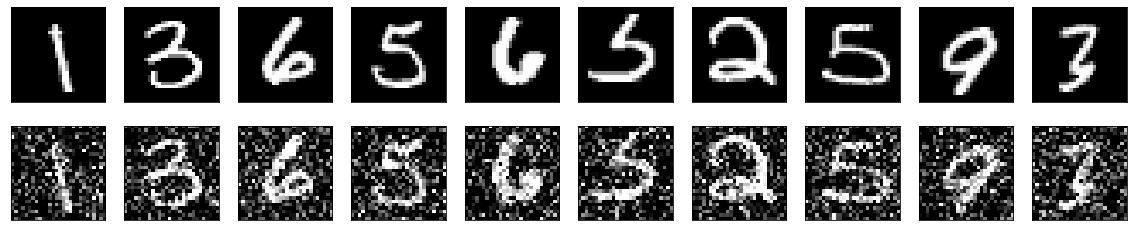

In [14]:
display(train_data, noisy_train_data)

In [ ]:
all_noisy_data = np.append(noisy_train_data, noisy_numbers, axis=0)
all_data = np.append(train_data, numbers, axis=0)

In [ ]:
noisy_numbers.shape

In [ ]:
noisy_train_data.shape

In [ ]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

In [ ]:
autoencoder.fit(
    x=noisy_train_data, # noisy_train_data
    y=train_data, # train_data
    epochs=5,
    batch_size=128,
    shuffle=True,
    # validation_data=(noisy_test_data, test_data),
)

In [5]:
model = keras.models.load_model('../../data/training_data/number_epochs120')

In [7]:
model.fit(
    x=noisy_numbers,
    y=numbers,
    epochs=120,
    batch_size=128,
    shuffle=True,
)
model.save('../../data/training_data/number_epochs120+120')

Epoch 1/120
469/469 [==============================] - 57s 120ms/step - loss: 0.0612
Epoch 2/120
469/469 [==============================] - 56s 118ms/step - loss: 0.0563
Epoch 3/120
469/469 [==============================] - 55s 118ms/step - loss: 0.0549
Epoch 4/120
469/469 [==============================] - 55s 118ms/step - loss: 0.0541
Epoch 5/120
469/469 [==============================] - 53s 113ms/step - loss: 0.0536
Epoch 6/120
469/469 [==============================] - 55s 117ms/step - loss: 0.0533
Epoch 7/120
469/469 [==============================] - 54s 114ms/step - loss: 0.0531
Epoch 8/120
469/469 [==============================] - 52s 111ms/step - loss: 0.0529
Epoch 9/120
469/469 [==============================] - 53s 112ms/step - loss: 0.0527
Epoch 10/120
469/469 [==============================] - 52s 112ms/step - loss: 0.0526
Epoch 11/120
469/469 [==============================] - 53s 112ms/step - loss: 0.0525
Epoch 12/120
469/469 [==============================] - 53s 113

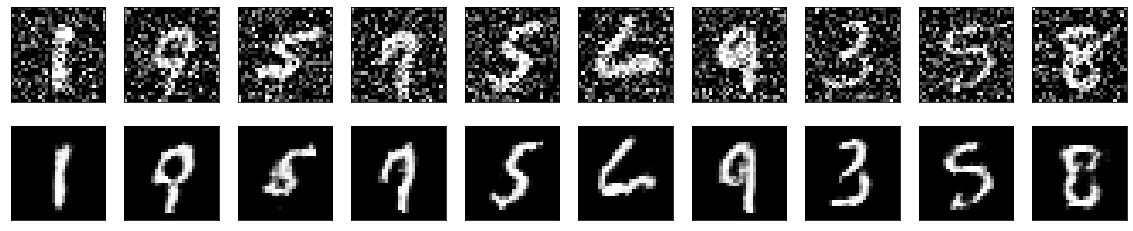

In [15]:
predictions = model.predict(noisy_test_data)
display(noisy_test_data, predictions)

In [16]:
four = np.array(Image.open('4.jpeg').convert('L'))
four = preprocess(np.array([four]))
noise_four = noise(four)

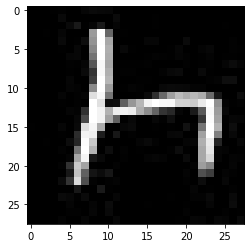

In [17]:
displayOne(four)

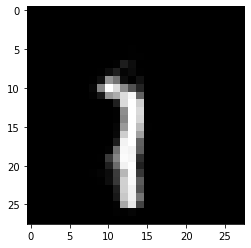

In [21]:
predictions = model.predict(one)
displayOne(predictions)